# Exploratory Data Analysis (EDA)
Use the dataset(s) provided to do some exploratory analysis - which is not expected to be exhaustive; it only needs to demonstrate some comfort level doing some interesting analysis and presenting findings

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import pandas_profiling as pp
import matplotlib.pyplot as plt

In [2]:
# Useful parameters
DATA_DIR = 'datasets/'
prod_estimates_dataset = 'PRODUCTION ESTIMATES.csv'
wholesale_prices_dataset = 'NATIONAL WHOLESALE PRICE OF SOME SELECTED COMMODITIES.csv'
rainfall_dataset = 'RAINFALL.csv'
path_to_prod_est_dataset = os.path.join(DATA_DIR, prod_estimates_dataset)
path_to_ws_prices_dataset = os.path.join(DATA_DIR, wholesale_prices_dataset)
path_to_rainfall_dataset = os.path.join(DATA_DIR, rainfall_dataset)
print('Production estimates dataset is found in:', path_to_prod_est_dataset)
print('Wholesale prices dataset is found in:', path_to_ws_prices_dataset)
print('Rainfall dataset is found in:', path_to_rainfall_dataset)

Production estimates dataset is found in: datasets/PRODUCTION ESTIMATES.csv
Wholesale prices dataset is found in: datasets/NATIONAL WHOLESALE PRICE OF SOME SELECTED COMMODITIES.csv
Rainfall dataset is found in: datasets/RAINFALL.csv


In [3]:
pro_est_df = pd.read_csv(path_to_prod_est_dataset)
pro_est_df.head(3)

REGION            DISTRICT  YEAR   CROP  AREA (HA) YIELD (MT/HA)  \
0  WESTERN   SHAMA AHANTA EAST  2008  MAIZE     1099.0          1.15   
1  WESTERN         WEST AHANTA  2008  MAIZE     1433.0          1.19   
2  WESTERN  MPORHOR WASSA EAST  2008  MAIZE     2034.0          1.32   

  PRODUCTION (MT)  
0         1263.85  
1         1705.27  
2         2684.88

In [4]:
ws_price_df = pd.read_csv(path_to_ws_prices_dataset, encoding = "ISO-8859-1", engine='python')
ws_price_df.head(3)

YEAR     MONTH COMMODITY  WEIGHT, KG PER BAG   PRICE, ¢ GH
0  2008   JANUARY     MAIZE                 100        13.694
1  2008  FEBRUARY     MAIZE                 100        13.066
2  2008     MARCH     MAIZE                 100        14.043

In [5]:
rainfall_df = pd.read_csv(path_to_rainfall_dataset)
rainfall_df.head(3)

YEAR         REGION  TOTAL RAINFALL(MM)
0  2008        WESTERN                1518
1  2008        CENTRAL                1361
2  2008  GREATER ACCRA                 914

# Production Estimates DataFrame Analysis

In [6]:
pro_est_df.head(3)

REGION            DISTRICT  YEAR   CROP  AREA (HA) YIELD (MT/HA)  \
0  WESTERN   SHAMA AHANTA EAST  2008  MAIZE     1099.0          1.15   
1  WESTERN         WEST AHANTA  2008  MAIZE     1433.0          1.19   
2  WESTERN  MPORHOR WASSA EAST  2008  MAIZE     2034.0          1.32   

  PRODUCTION (MT)  
0         1263.85  
1         1705.27  
2         2684.88

In [7]:
pro_est_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8236 entries, 0 to 8235
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   REGION           8236 non-null   object 
 1   DISTRICT         8236 non-null   object 
 2   YEAR             8236 non-null   int64  
 3   CROP             8236 non-null   object 
 4   AREA (HA)        8236 non-null   float64
 5   YIELD (MT/HA)    8220 non-null   object 
 6   PRODUCTION (MT)  8234 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 450.5+ KB


In [8]:
pro_est_df.columns

Index(['REGION', 'DISTRICT', 'YEAR', 'CROP', 'AREA (HA)', 'YIELD (MT/HA)',
       'PRODUCTION (MT)'],
      dtype='object')

In [9]:
pro_est_df.loc[pro_est_df.isnull().any(axis=1)].tail()

REGION         DISTRICT  YEAR     CROP  AREA (HA)  \
6483  EASTERN        FANTEAKWA  2016     RICE      23.07   
6579  EASTERN       KWAHU EAST  2016   COWPEA      16.53   
7762  CENTRAL       AGONA EAST  2017  COCOYAM      65.00   
8120  ASHANTI   SEKYERE SOUTH   2017   COWPEA      41.00   
8121  ASHANTI   AFIGYA KWABRE   2017   COWPEA      33.00   

                         YIELD (MT/HA) PRODUCTION (MT)  
6483                               NaN              -   
6579                               NaN              -   
7762                               NaN              -   
8120                             -                 NaN  
8121                             -                 NaN

The production estimates dataframe has 8326 rows, of which 18 are null values. Also some rows have no data recorded. It is assumed Production did not take place in such districts as such their Production will be zero; same for their Yield.

In [10]:
pro_est_df = pro_est_df.fillna(0)

In [11]:
pro_est_df = pro_est_df.replace(" -   ", 0)

In [12]:
pro_est_df = pro_est_df.replace(" - ", 0)

In [13]:
pro_est_df = pro_est_df.replace("                           -    ", 0)

In [14]:
pro_est_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8236 entries, 0 to 8235
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   REGION           8236 non-null   object 
 1   DISTRICT         8236 non-null   object 
 2   YEAR             8236 non-null   int64  
 3   CROP             8236 non-null   object 
 4   AREA (HA)        8236 non-null   float64
 5   YIELD (MT/HA)    8236 non-null   object 
 6   PRODUCTION (MT)  8236 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 450.5+ KB


In [15]:
pro_est_df['AREA (HA)'] = pd.to_numeric(pro_est_df['AREA (HA)'])

In [16]:
pro_est_df['YIELD (MT/HA)'] = pd.to_numeric(pro_est_df['YIELD (MT/HA)'])

In [17]:
pro_est_df['PRODUCTION (MT)'] = pd.to_numeric(pro_est_df['PRODUCTION (MT)'])

In [18]:
pp.ProfileReport(pro_est_df)

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
pro_est_df.describe()

YEAR     AREA (HA)  YIELD (MT/HA)  PRODUCTION (MT)
count  8236.000000   8236.000000    8236.000000     8.236000e+03
mean   2012.969888   3996.539373       6.961456     3.265124e+04
std       2.864953   4868.861002       6.576048     6.558999e+04
min    2008.000000      0.020000       0.000000     0.000000e+00
25%    2011.000000    540.000000       1.440000     1.782000e+03
50%    2013.000000   2308.445000       4.600000     7.477235e+03
75%    2016.000000   5860.000000      10.900000     2.956623e+04
max    2017.000000  54300.000000      42.450000     1.241400e+06

## UNIVARIATE Analysis

### AREA Analysis

(array([4.978e+03, 1.764e+03, 8.420e+02, 3.640e+02, 1.150e+02, 8.400e+01,
        2.700e+01, 2.800e+01, 1.600e+01, 4.000e+00, 9.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00]),
 array([2.00000000e-02, 3.62001867e+03, 7.24001733e+03, 1.08600160e+04,
        1.44800147e+04, 1.81000133e+04, 2.17200120e+04, 2.53400107e+04,
        2.89600093e+04, 3.25800080e+04, 3.62000067e+04, 3.98200053e+04,
        4.34400040e+04, 4.70600027e+04, 5.06800013e+04, 5.43000000e+04]),
 <BarContainer object of 15 artists>)

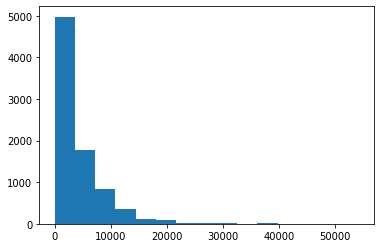

In [20]:
plt.hist(pro_est_df['AREA (HA)'], bins = 15)

{'whiskers': [<matplotlib.lines.Line2D at 0x25eb31b2b88>,
 'caps': [<matplotlib.lines.Line2D at 0x25eb31b6ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x25eb31b2448>],
 'medians': [<matplotlib.lines.Line2D at 0x25eb2faacc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x25eb2faa088>],
 'means': []}

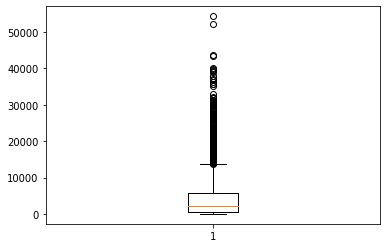

In [21]:
plt.boxplot(pro_est_df['AREA (HA)'])

In [22]:
area_first_quartile = 540
area_second_quartile = 2308.445
area_third_quartile = 5860
area_mean = 3996.539373
area_IQR = area_third_quartile - area_first_quartile
area_outlier_range = area_third_quartile + (1.5 * area_IQR)
print(area_outlier_range)

13840.0


In [23]:
len(pro_est_df.loc[pro_est_df['AREA (HA)'] < area_mean])

5173

In [24]:
len(pro_est_df.loc[pro_est_df['AREA (HA)'] < area_second_quartile])

4118

In [25]:
len(pro_est_df.loc[pro_est_df['AREA (HA)'] > area_outlier_range])

325

### YIELD Analysis

(array([3.566e+03, 9.190e+02, 8.410e+02, 9.760e+02, 5.900e+02, 5.120e+02,
        4.120e+02, 2.380e+02, 1.000e+02, 4.900e+01, 1.200e+01, 7.000e+00,
        6.000e+00, 2.000e+00, 6.000e+00]),
 array([ 0.  ,  2.83,  5.66,  8.49, 11.32, 14.15, 16.98, 19.81, 22.64,
        25.47, 28.3 , 31.13, 33.96, 36.79, 39.62, 42.45]),
 <BarContainer object of 15 artists>)

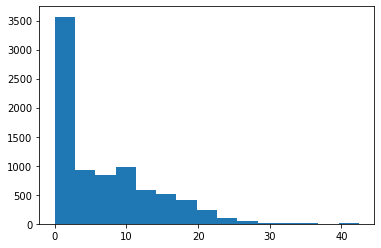

In [26]:
plt.hist(pro_est_df['YIELD (MT/HA)'], bins = 15)

{'whiskers': [<matplotlib.lines.Line2D at 0x25eb3090e48>,
 'caps': [<matplotlib.lines.Line2D at 0x25eb3093808>,
 'boxes': [<matplotlib.lines.Line2D at 0x25eb3090548>],
 'medians': [<matplotlib.lines.Line2D at 0x25eb3090d48>],
 'fliers': [<matplotlib.lines.Line2D at 0x25eb3093608>],
 'means': []}

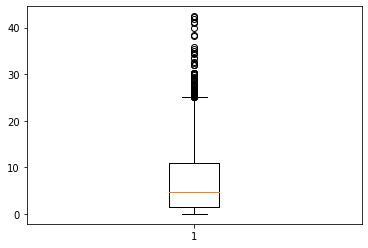

In [27]:
plt.boxplot(pro_est_df['YIELD (MT/HA)'])

In [28]:
yield_first_quartile = 1.440000
yield_second_quartile = 4.600000
yield_third_quartile = 10.900000
yield_mean = 6.961456
yield_IQR = yield_third_quartile - yield_first_quartile
yield_outlier_range = yield_third_quartile + (1.5 * yield_IQR)
print(yield_outlier_range)

25.090000000000003


In [29]:
len(pro_est_df.loc[pro_est_df['YIELD (MT/HA)'] < yield_mean])

4908

In [30]:
len(pro_est_df.loc[pro_est_df['YIELD (MT/HA)'] < yield_second_quartile])

4113

In [31]:
len(pro_est_df.loc[pro_est_df['YIELD (MT/HA)'] > yield_outlier_range])

89

### PRODUCTION Analysis

(array([7.223e+03, 6.250e+02, 2.360e+02, 8.100e+01, 3.100e+01, 2.400e+01,
        9.000e+00, 4.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00]),
 array([      0.,   82760.,  165520.,  248280.,  331040.,  413800.,
         496560.,  579320.,  662080.,  744840.,  827600.,  910360.,
         993120., 1075880., 1158640., 1241400.]),
 <BarContainer object of 15 artists>)

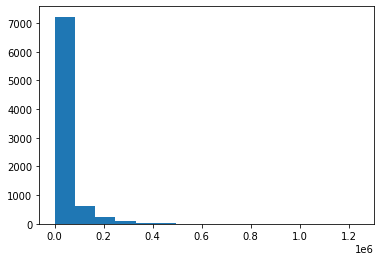

In [32]:
plt.hist(pro_est_df['PRODUCTION (MT)'], bins = 15)

{'whiskers': [<matplotlib.lines.Line2D at 0x25eb322f208>,
 'caps': [<matplotlib.lines.Line2D at 0x25eb322f0c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x25eb322d888>],
 'medians': [<matplotlib.lines.Line2D at 0x25eb322f108>],
 'fliers': [<matplotlib.lines.Line2D at 0x25eb322f308>],
 'means': []}

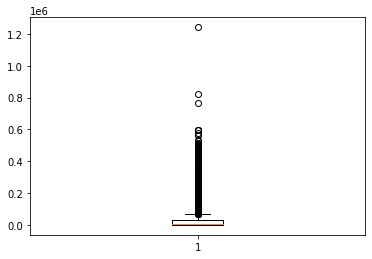

In [33]:
plt.boxplot(pro_est_df['PRODUCTION (MT)'])

In [34]:
production_first_quartile = 1.782000e+03
production_second_quartile = 7.477235e+03
production_third_quartile = 2.956623e+04
production_mean = 3.265124e+04
production_IQR = production_third_quartile - production_first_quartile
production_outlier_range = production_third_quartile + (1.5 * production_IQR)
print(production_outlier_range)

71242.575


In [35]:
len(pro_est_df.loc[pro_est_df['PRODUCTION (MT)'] < production_mean])

6295

In [36]:
len(pro_est_df.loc[pro_est_df['PRODUCTION (MT)'] < production_second_quartile])

4118

In [37]:
len(pro_est_df.loc[pro_est_df['PRODUCTION (MT)'] > production_outlier_range])

1133

## TIME Analysis

In [38]:
years = []
year_count = []
non_zero_pro_est_df = pro_est_df.loc[(pro_est_df['PRODUCTION (MT)'] != 0) & (pro_est_df['YIELD (MT/HA)'] != 0)]
for year in non_zero_pro_est_df['YEAR'].unique():
    years.append(year)
for count in np.array(non_zero_pro_est_df['YEAR'].value_counts()):
    year_count.append(count)

<BarContainer object of 10 artists>

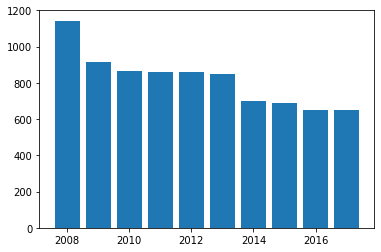

In [39]:
plt.bar(years, height = year_count)

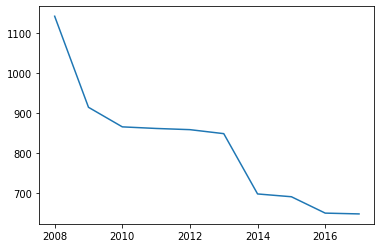

In [40]:
plt.plot(years, year_count)

## MULTIVARIATE Analysis

In [41]:
pro_est_df['YEAR']

0       2008
1       2008
2       2008
3       2008
4       2008
        ... 
8231    2017
8232    2017
8233    2017
8234    2017
8235    2017
Name: YEAR, Length: 8236, dtype: int64

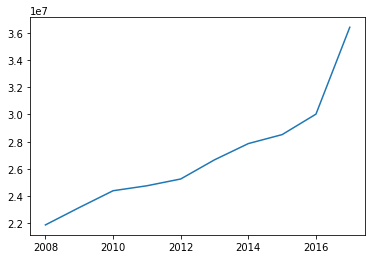

In [42]:
plt.plot(years, pro_est_df.groupby(['YEAR'])['PRODUCTION (MT)'].sum())

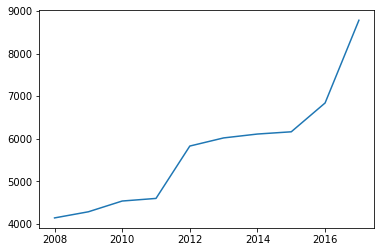

In [43]:
plt.plot(years, pro_est_df.groupby(['YEAR'])['YIELD (MT/HA)'].sum())

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

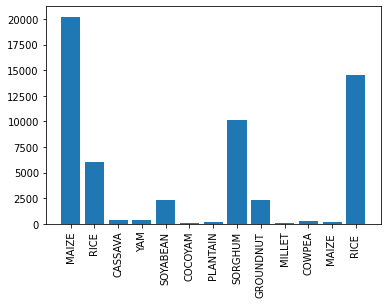

In [44]:
crops = []
for crop in non_zero_pro_est_df['CROP'].unique():
    crops.append(crop)
plt.bar(crops, pro_est_df.groupby(['CROP'])['YIELD (MT/HA)'].sum())
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

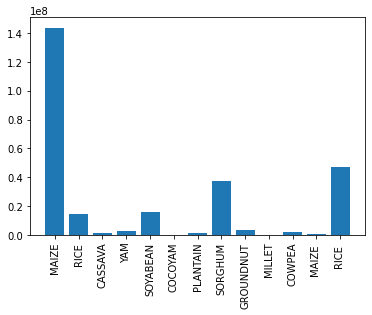

In [45]:
crops = []
for crop in non_zero_pro_est_df['CROP'].unique():
    crops.append(crop)
plt.bar(crops, pro_est_df.groupby(['CROP'])['PRODUCTION (MT)'].sum())
plt.xticks(rotation=90)

array([<AxesSubplot:ylabel='AREA (HA)'>], dtype=object)

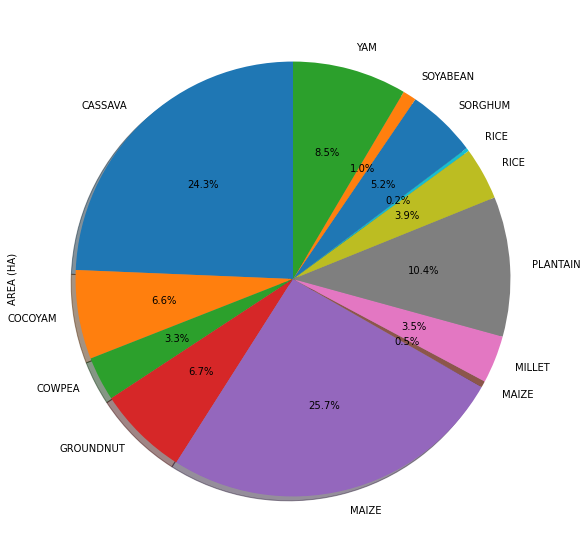

In [46]:
pro_est_df.groupby(['CROP'])['AREA (HA)'].sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(15,10), 
                                        autopct='%1.1f%%')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


array([<AxesSubplot:ylabel='PRODUCTION (MT)'>,
       <AxesSubplot:ylabel='YIELD (MT/HA)'>], dtype=object)

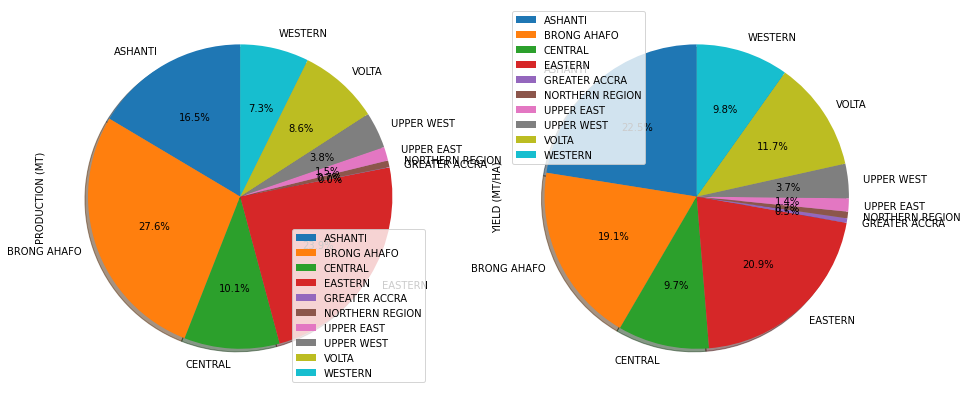

In [47]:
pro_est_df.groupby(['REGION'])['PRODUCTION (MT)', 'YIELD (MT/HA)'].sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(15,10), 
                                        autopct='%1.1f%%')

In [48]:
pro_est_df.sort_values('YIELD (MT/HA)', ascending =False).head(15)

REGION                          DISTRICT  YEAR     CROP  \
8004        ASHANTI                     SEKYERE EAST   2017  CASSAVA   
6645        ASHANTI                      SEKYERE EAST  2016  CASSAVA   
3032        ASHANTI              SEKYERE AFRAM PLAINS  2012  CASSAVA   
5625        ASHANTI                     SEKYERE EAST   2015  CASSAVA   
4490        ASHANTI                      SEKYERE EAST  2014  CASSAVA   
3622        ASHANTI                      SEKYERE EAST  2013  CASSAVA   
7589        EASTERN                             ATIWA  2017  CASSAVA   
8147  GREATER ACCRA  NINGO-PRAMPRAM DISTRICT ASSEMBLY  2017  CASSAVA   
2801        CENTRAL                       ASSIN SOUTH  2012  CASSAVA   
6496        EASTERN                             ATIWA  2016  CASSAVA   
5531        EASTERN                             ATIWA  2015  CASSAVA   
2872        EASTERN                             ATIWA  2012  CASSAVA   
3845        EASTERN                             ATIWA  2013  CASSAVA   
4713        EASTERN                             ATIWA  2014  CASSAVA   
6812    BRONG AHAFO                       DORMAA EAST  2016  CASSAVA   

      AREA (HA)  YIELD (MT/HA)  PRODUCTION (MT)  
8004    3651.00          42.45        154984.95  
6645    3566.00          42.35        151029.00  
3032    3194.00          41.82        133573.08  
5625    3532.67          41.23        145650.69  
4490    3352.00          41.00        137432.00  
3622    3250.00          40.00        130000.00  
7589    8803.00          38.35        337595.05  
8147     148.00          38.20          5653.60  
2801    3472.00          35.85        124471.20  
6496    8363.91          35.40        296091.93  
5531    8149.34          34.88        284245.69  
2872    7842.00          34.56        271019.52  
3845    7865.00          34.50        271342.50  
4713    7857.00          34.40        270280.80  
6812    6611.00          33.58        221968.50

In [49]:
pro_est_df.loc[(pro_est_df['YIELD (MT/HA)'] != 0)].sort_values('YIELD (MT/HA)', ascending =False).tail(15)

REGION                     DISTRICT  YEAR      CROP  AREA (HA)  \
4767  UPPER EAST         BOLGATANGA MUNICIPAL  2014  SOYABEAN     308.00   
2582     ASHANTI          EJURA SEKYEREDUMASE  2011    COWPEA    6060.00   
8124     ASHANTI                    BOSUMTWE   2017    COWPEA      63.00   
5769  UPPER EAST         BOLGATANGA MUNICIPAL  2015  SOYABEAN     305.15   
3899  UPPER EAST         BOLGATANGA MUNICIPAL  2013  SOYABEAN     381.00   
3519  UPPER EAST         BOLGATANGA MUNICIPAL  2012    COWPEA    2630.00   
2588     ASHANTI     BOSUMTWE-ATWIMA-KWANWOMA  2011    COWPEA      70.00   
5013     ASHANTI                     BOSUMTWE  2014    COWPEA      78.00   
6033     ASHANTI                    BOSUMTWE   2015    COWPEA      70.34   
4319  UPPER EAST         BOLGATANGA MUNICIPAL  2013    COWPEA    1588.00   
6124  UPPER EAST         BOLGATANGA MUNICIPAL  2015    COWPEA    1345.00   
5185  UPPER EAST         BOLGATANGA MUNICIPAL  2014    COWPEA    1345.00   
1084     CENTRAL  TWIFO HERMAN LOWER DENKYIRA  2009   COCOYAM    2060.00   
434      CENTRAL  TWIFO HERMAN LOWER DENKYIRA  2008   COCOYAM    2035.00   
7485  UPPER EAST                       NABDAM  2017    MILLET    4047.62   

      YIELD (MT/HA)  PRODUCTION (MT)  
4767           0.34           104.72  
2582           0.32          1939.20  
8124           0.32            20.16  
5769           0.32            98.04  
3899           0.30           114.30  
3519           0.30           789.00  
2588           0.30            21.00  
5013           0.30            23.40  
6033           0.28            19.79  
4319           0.25           397.00  
6124           0.23           303.73  
5185           0.23           309.35  
1084           0.20           420.00  
434            0.20           407.00  
7485           0.07           265.40

In [50]:
pro_est_df.sort_values('PRODUCTION (MT)', ascending =False).head(15)

REGION             DISTRICT  YEAR     CROP  AREA (HA)  YIELD (MT/HA)  \
7724  CENTRAL  UPPER DENKYIRA WEST  2017  CASSAVA    5456.00          19.50   
7726  CENTRAL          ASSIN SOUTH  2017  CASSAVA    4856.00          33.40   
7727  CENTRAL          ASSIN NORTH  2017  CASSAVA    7457.00          25.60   
6525  EASTERN         AFRAM PLAINS  2016      YAM   26135.79          22.91   
5560  EASTERN         AFRAM PLAINS  2015      YAM   26056.41          22.93   
2195    VOLTA              NKWANTA  2011  CASSAVA   32122.00          18.57   
4742  EASTERN         AFRAM PLAINS  2014      YAM   25776.00          22.50   
1492    VOLTA              NKWANTA  2010  CASSAVA   31020.00          18.21   
837     VOLTA              NKWANTA  2009  CASSAVA   31000.00          18.19   
796   EASTERN         AFRAM PLAINS  2009      YAM   26800.00          20.00   
3874  EASTERN         AFRAM PLAINS  2013      YAM   25750.00          20.50   
189     VOLTA              NKWANTA  2008  CASSAVA   30300.00          17.00   
7734  CENTRAL          AWUTU-SENYA  2017  CASSAVA   24488.00          20.90   
6504  EASTERN         AFRAM PLAINS  2016  CASSAVA   20178.73          25.16   
148   EASTERN         AFRAM PLAINS  2008      YAM   26000.00          19.40   

      PRODUCTION (MT)  
7724       1241400.00  
7726        820359.54  
7727        767827.20  
6525        598830.94  
5560        597358.80  
2195        596640.45  
4742        579960.00  
1492        564874.20  
837         563890.00  
796         536000.00  
3874        527875.00  
189         515100.00  
7734        511799.20  
6504        507787.66  
148         504400.00

In [51]:
pro_est_df.loc[(pro_est_df['PRODUCTION (MT)'] != 0)].sort_values('PRODUCTION (MT)', ascending =False).tail(15)

REGION                      DISTRICT  YEAR      CROP  AREA (HA)  \
7690        EASTERN                   KWAHU SOUTH  2017    COWPEA      15.00   
6886    BRONG AHAFO              ATEBUBU -AMANTIN  2016  PLANTAIN      15.00   
8157  GREATER ACCRA                    GA CENTRAL  2017   CASSAVA       1.00   
5954        EASTERN                   KWAHU SOUTH  2015    COWPEA      14.45   
6078    BRONG AHAFO             ATEBUBU -AMANTIN   2015  PLANTAIN      11.68   
5058    BRONG AHAFO              ATEBUBU -AMANTIN  2014  PLANTAIN      11.52   
245         ASHANTI  KUMASI METROPOLITAN ASSEMBLY  2008      RICE      10.00   
4143        ASHANTI                  SEKYERE EAST  2013    COWPEA      20.00   
4194    BRONG AHAFO              ATEBUBU -AMANTIN  2013  PLANTAIN      11.00   
3477    BRONG AHAFO              ATEBUBU -AMANTIN  2012  PLANTAIN      10.50   
2625    BRONG AHAFO              ATEBUBU -AMANTIN  2011  PLANTAIN      10.00   
372      UPPER EAST          BOLGATANGA MUNICIPAL  2008  SOYABEAN       5.00   
8142  GREATER ACCRA                    GA CENTRAL  2017    MAIZE        1.50   
112         EASTERN                     EAST AKIM  2008      RICE       0.50   
8141  GREATER ACCRA   ACCRA METROPOLITAN ASSEMBLY  2017    MAIZE        0.02   

      YIELD (MT/HA)  PRODUCTION (MT)  
7690           1.00            15.00  
6886           1.00            15.00  
8157          15.00            15.00  
5954           0.97            13.98  
6078           0.98            11.44  
5058           0.95            11.00  
245            1.00            10.00  
4143           0.50            10.00  
4194           0.83             9.13  
3477           0.81             8.51  
2625           0.80             8.00  
372            1.12             5.60  
8142           1.20             1.80  
112            1.50             0.75  
8141           1.20             0.02

In [52]:
corr = pro_est_df.corr()
corr.style.background_gradient(cmap='coolwarm')

# Rainfall DataFrame Analysis

In [53]:
rainfall_df.head(3)

YEAR         REGION  TOTAL RAINFALL(MM)
0  2008        WESTERN                1518
1  2008        CENTRAL                1361
2  2008  GREATER ACCRA                 914

In [54]:
rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   YEAR                100 non-null    int64 
 1   REGION              100 non-null    object
 2   TOTAL RAINFALL(MM)  100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [55]:
rainfall_df.columns

Index(['YEAR', 'REGION', 'TOTAL RAINFALL(MM)'], dtype='object')

In [56]:
pp.ProfileReport(rainfall_df)

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [57]:
rainfall_df.describe()

YEAR  TOTAL RAINFALL(MM)
count   100.000000          100.000000
mean   2012.500000         1084.200000
std       2.886751          305.835501
min    2008.000000          300.000000
25%    2010.000000          880.750000
50%    2012.500000         1081.500000
75%    2015.000000         1293.500000
max    2017.000000         1814.000000

Since we already have a high correlation between **Region and Rainfall** and also **Year and Rainfall** as shown the Profile Report,we will keep all the columns. We will merge this dataset with the Production Estimate dataframe later for the machine learning model. Also, since we already have the statistics as given by the describe method, we will skip the Univariate analysis and move straight to the Multivariate analysis of this Rainfall dataset.

## MULTIVARIATE Analysis

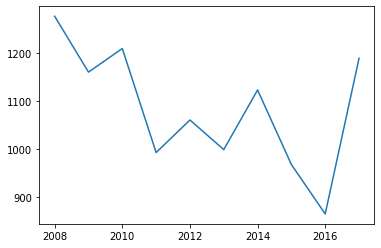

In [58]:
plt.plot(years, rainfall_df.groupby(['YEAR'])['TOTAL RAINFALL(MM)'].mean())

array([<AxesSubplot:ylabel='TOTAL RAINFALL(MM)'>], dtype=object)

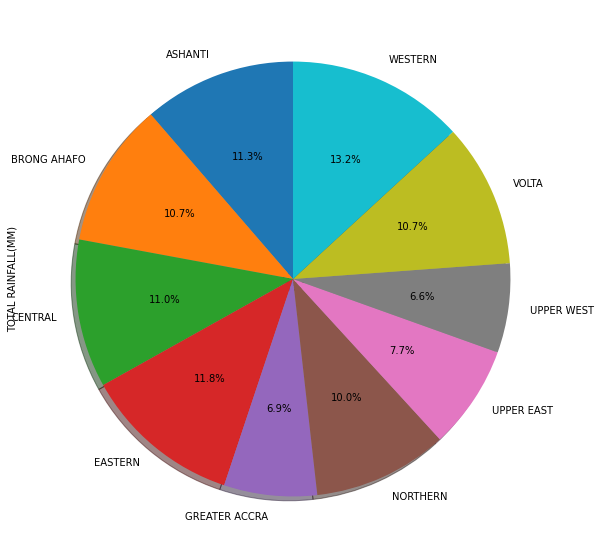

In [59]:
rainfall_df.groupby(['REGION'])['TOTAL RAINFALL(MM)'].mean().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(15,10), 
                                        autopct='%1.1f%%')

# NATIONWIDE PRICES DataFrame Analysis

In [60]:
ws_price_df.head(3)

YEAR     MONTH COMMODITY  WEIGHT, KG PER BAG   PRICE, ¢ GH
0  2008   JANUARY     MAIZE                 100        13.694
1  2008  FEBRUARY     MAIZE                 100        13.066
2  2008     MARCH     MAIZE                 100        14.043

In [61]:
ws_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                720 non-null    int64  
 1   MONTH               720 non-null    object 
 2   COMMODITY           720 non-null    object 
 3   WEIGHT, KG PER BAG  720 non-null    int64  
 4    PRICE, ¢ GH        720 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 28.2+ KB


In [62]:
ws_price_df.columns

Index(['YEAR', 'MONTH', 'COMMODITY', 'WEIGHT, KG PER BAG', ' PRICE, ¢ GH'], dtype='object')

In [63]:
ws_price_df.columns = ['YEAR', 'MONTH', 'COMMODITY', 'WEIGHT, KG PER BAG', 'PRICE, ¢ GH']

In [64]:
pp.ProfileReport(ws_price_df)

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [65]:
ws_price_df.describe()

YEAR  WEIGHT, KG PER BAG  PRICE, ¢ GH
count   720.000000          720.000000   720.000000
mean   2012.491667          123.833333   113.982091
std       2.871361           56.759258   162.115749
min    2008.000000           91.000000     0.007000
25%    2010.000000           93.000000    15.141000
50%    2012.500000          100.000000    52.390000
75%    2015.000000          109.000000   140.122500
max    2017.000000          250.000000   920.550000

## UNIVARIATE Analysis

In [66]:
ws_price_df.YEAR.value_counts()

2013    78
2008    72
2009    72
2010    72
2011    72
2012    72
2015    72
2016    72
2017    72
2014    66
Name: YEAR, dtype: int64

In [67]:
ws_price_df['WEIGHT, KG PER BAG'].value_counts()

100    240
93     120
109    120
250    120
91     120
Name: WEIGHT, KG PER BAG, dtype: int64

(array([382., 133.,  54.,  58.,  24.,   6.,  12.,  11.,  13.,   7.,   9.,
          5.,   1.,   1.,   4.]),
 array([7.00000000e-03, 6.13765333e+01, 1.22746067e+02, 1.84115600e+02,
        2.45485133e+02, 3.06854667e+02, 3.68224200e+02, 4.29593733e+02,
        4.90963267e+02, 5.52332800e+02, 6.13702333e+02, 6.75071867e+02,
        7.36441400e+02, 7.97810933e+02, 8.59180467e+02, 9.20550000e+02]),
 <BarContainer object of 15 artists>)

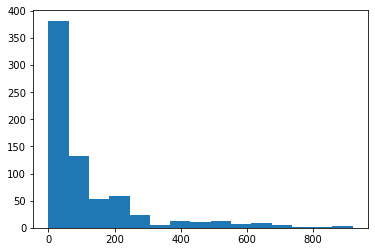

In [68]:
plt.hist(ws_price_df['PRICE, ¢ GH'], bins = 15)

{'whiskers': [<matplotlib.lines.Line2D at 0x25eb17f9ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x25eb17f9ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x25eb17f95c8>],
 'medians': [<matplotlib.lines.Line2D at 0x25eb181c708>],
 'fliers': [<matplotlib.lines.Line2D at 0x25eb17f9bc8>],
 'means': []}

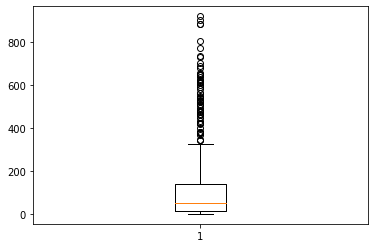

In [70]:
plt.boxplot(ws_price_df['PRICE, ¢ GH'])

In [72]:
price_first_quartile = 15.141000
price_second_quartile = 52.390000
price_third_quartile = 140.122500
price_mean = 140.122500
price_IQR = price_third_quartile - price_first_quartile
price_outlier_range = price_third_quartile + (1.5 * price_IQR)
print(price_outlier_range)

327.59475


In [74]:
len(ws_price_df.loc[ws_price_df['PRICE, ¢ GH'] < price_mean])

540

In [75]:
len(ws_price_df.loc[ws_price_df['PRICE, ¢ GH'] < price_second_quartile])

360

In [76]:
len(ws_price_df.loc[ws_price_df['PRICE, ¢ GH'] > price_outlier_range])

66

## MULTIVARIATE Analysis

In [81]:
ws_price_df.groupby(['YEAR'])['COMMODITY','PRICE, ¢ GH'].max()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


COMMODITY  PRICE, ¢ GH
YEAR                       
2008       YAM       689.87
2009       YAM       920.55
2010       YAM       884.20
2011       YAM       202.10
2012       YAM       280.46
2013       YAM       297.40
2014       YAM       344.45
2015       YAM       378.35
2016       YAM       524.89
2017       YAM       637.65

In [82]:
ws_price_df.groupby(['YEAR'])['COMMODITY','PRICE, ¢ GH'].min()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


COMMODITY  PRICE, ¢ GH
YEAR                       
2008   COCOYAM        0.131
2009   COCOYAM        3.317
2010   COCOYAM        4.382
2011   COCOYAM        0.007
2012   COCOYAM        0.010
2013   COCOYAM        0.008
2014   COCOYAM        0.010
2015   COCOYAM        0.010
2016   COCOYAM        0.010
2017   COCOYAM        0.020

In [84]:
ws_price_df.groupby(['YEAR'])['MONTH','PRICE, ¢ GH'].max()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


MONTH  PRICE, ¢ GH
YEAR                        
2008  SEPTEMBER       689.87
2009  SEPTEMBER       920.55
2010  SEPTEMBER       884.20
2011  SEPTEMBER       202.10
2012  SEPTEMBER       280.46
2013  SEPTEMBER       297.40
2014  SEPTEMBER       344.45
2015  SEPTEMBER       378.35
2016  SEPTEMBER       524.89
2017  SEPTEMBER       637.65

In [85]:
ws_price_df.groupby(['YEAR'])['MONTH','PRICE, ¢ GH'].min()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


MONTH  PRICE, ¢ GH
YEAR                    
2008  APRIL        0.131
2009  APRIL        3.317
2010  APRIL        4.382
2011  APRIL        0.007
2012  APRIL        0.010
2013  APRIL        0.008
2014  APRIL        0.010
2015  APRIL        0.010
2016  APRIL        0.010
2017  APRIL        0.020

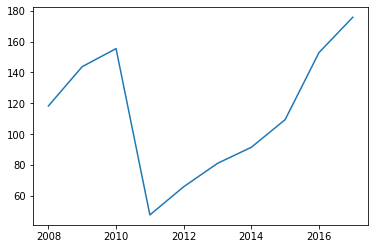

In [88]:
plt.plot(years, ws_price_df.groupby(['YEAR'])['PRICE, ¢ GH'].mean())

In [89]:
corr = ws_price_df.corr()
corr.style.background_gradient()